In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix


In [19]:
# First, import TF and get its version.
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import regularizers
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [10]:
print(tf.config.list_physical_devices('GPU'))

[]


## Loading the raw data

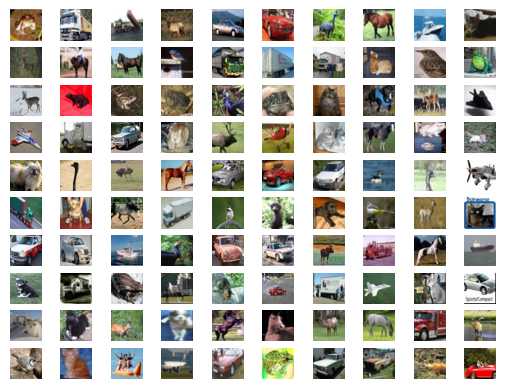

In [11]:

def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,10):
        for j in range(0,10):
            plt.subplot2grid((10,10),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

show_imgs(X_train)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(y_train[:10])
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
(10000, 32, 32, 3)
(10000, 1)


In [13]:
X_train =  X_train.reshape(50000, 32* 32* 3) #                     change the shape towards (60000, 784)
X_test =   X_test.reshape(10000, 32*32*3) # ...                   
X_train =  X_train.astype('float32')# ...                     change the type towards float32
X_test =   X_test.astype('float32')# ...                     idem
X_train /= 255.0# ...                     normalize the range to be between 0.0 and 1.0
X_test /=  255.0# ...
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [14]:
n_classes = 10
Y_train = keras.utils.to_categorical(y_train, n_classes)# ...                  modify targets to 1-hot using utils.to_categorical()
Y_test = keras.utils.to_categorical(y_test, n_classes)# ...                   idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## One-layer network and weight visualisation

In [22]:
E = 5                # number of epochs
B = 128               # batch size
D = X_train.shape[1] # dimension of input sample

# ... define the model as a Sequential type
# ... add a layer of type Dense with softmax activation

model = keras.models.Sequential()
model.add(keras.layers.Dense(n_classes, input_shape=(D,), activation='softmax', kernel_regularizer=regularizers.l2(0.05)))


# ... print model information with summary() method
model.summary()   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


## Compile and train the network

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train,Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test,Y_test))


Epoch 1/5
391/391 [==============================] - 4s 9ms/step - loss: 2.3295 - accuracy: 0.3003 - val_loss: 2.0437 - val_accuracy: 0.3170
Epoch 2/5
391/391 [==============================] - 2s 6ms/step - loss: 1.9947 - accuracy: 0.3291 - val_loss: 1.9624 - val_accuracy: 0.3482
Epoch 3/5
391/391 [==============================] - 3s 7ms/step - loss: 1.9822 - accuracy: 0.3341 - val_loss: 2.0380 - val_accuracy: 0.3103
Epoch 4/5
391/391 [==============================] - 3s 7ms/step - loss: 1.9927 - accuracy: 0.3261 - val_loss: 1.9741 - val_accuracy: 0.3371
Epoch 5/5
391/391 [==============================] - 3s 7ms/step - loss: 1.9883 - accuracy: 0.3302 - val_loss: 2.0065 - val_accuracy: 0.3294


## Evaluate the network

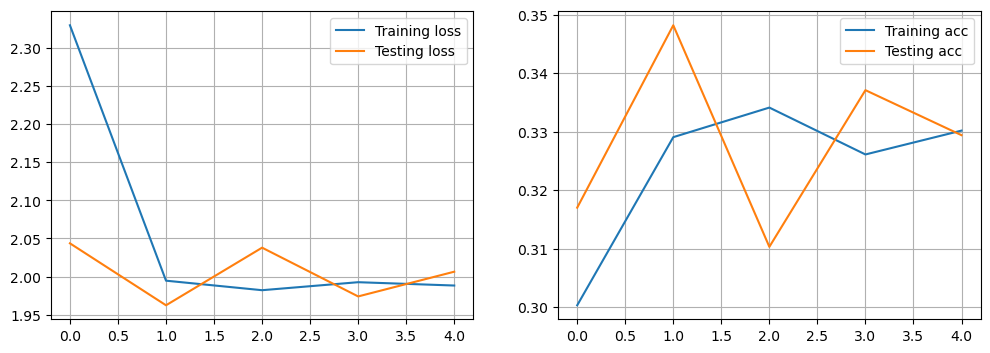

In [26]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation

In [27]:
loss_test, metric_test = model.evaluate(X_test, Y_test,verbose=1)    # ... evaluate model performance on test set, verbose tells progressbar of code, 0 means no progress bar, 1 means progressbar indicating the progress of evaluation, 2 means prints one line for every epoch during evaluation showing the overall progress.
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 2s 6ms/step - loss: 2.0065 - accuracy: 0.3294
Test loss: 2.006465435028076
Test accuracy: 0.3294000029563904


### Plot the weights

(3072, 10)
(10,)


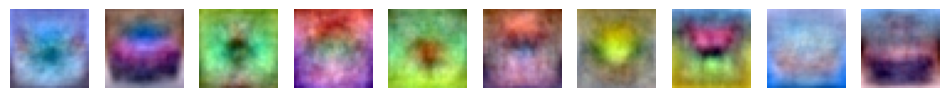

In [31]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]                  # get the weights landing to neuron i
    im = im.reshape(32,32,3)        # reshape the vector of weights into 28x28 image
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)
    max = np.max(im)
    im = np.round((im - min)/(max - min) * 255).astype(int)
    ax.axis('off')
    ax.imshow(im)